C:\Users\최지원\AppData\Local\Temp\ipykernel_15388\4289755059.py:24: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='cp949')
C:\Users\최지원\AppData\Local\Temp\ipykernel_15388\4289755059.py:45: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(file_path, encoding='cp949')


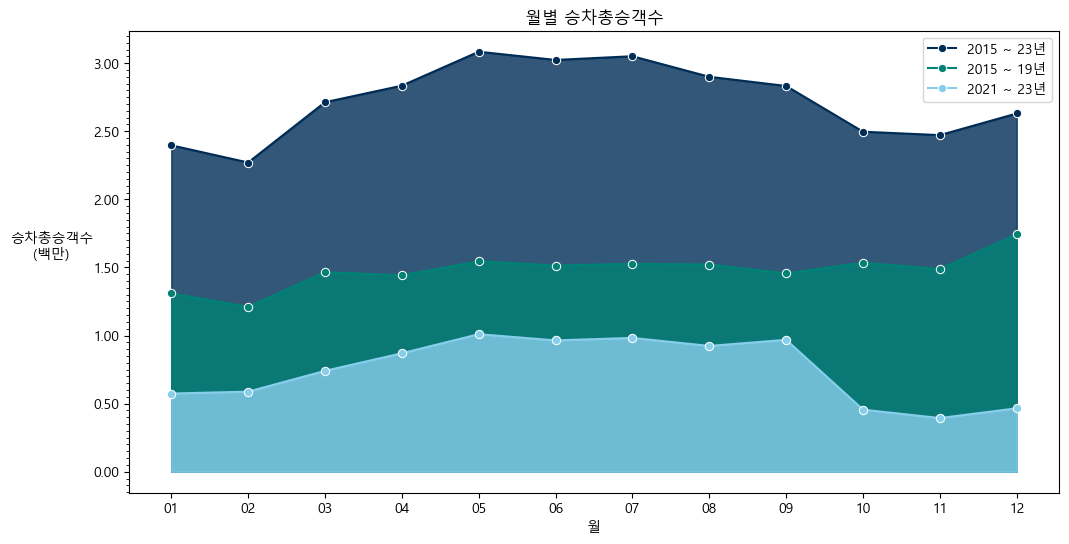

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import FuncFormatter, MultipleLocator

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# '사용년월' 컬럼에서 월 부분을 추출하여 새로운 칼럼 만들기
merged_df['Month'] = merged_df['사용년월'].astype(str).str[-2:]

# 월이 같은 데이터들을 그룹화하여 승차총승객수 합치기
monthly_passengers = merged_df.groupby('Month')['승차총승객수'].sum().reset_index()


# 2015년부터 2019년 파일들을 불러오기
files_to_read2 = [f'{year}_NBusData.csv' for year in range(2015, 2020)]

df_list2 = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read2:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df2 = pd.read_csv(file_path, encoding='cp949')
    df_list2.append(df2)

# 모든 데이터프레임을 합치기
merged_df2 = pd.concat(df_list2, ignore_index=True)

# '사용년월' 컬럼에서 월 부분을 추출하여 새로운 칼럼 만들기
merged_df2['Month'] = merged_df2['사용년월'].astype(str).str[-2:]

# 월이 같은 데이터들을 그룹화하여 승차총승객수 합치기
monthly_passengers2 = merged_df2.groupby('Month')['승차총승객수'].sum().reset_index()


# 2021년부터 2023년 파일들을 불러오기
files_to_read3 = [f'{year}_NBusData.csv' for year in range(2022, 2024)]

df_list3 = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read3:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df3 = pd.read_csv(file_path, encoding='cp949')
    df_list3.append(df3)

# 모든 데이터프레임을 합치기
merged_df3 = pd.concat(df_list3, ignore_index=True)

# '사용년월' 컬럼에서 월 부분을 추출하여 새로운 칼럼 만들기
merged_df3['Month'] = merged_df3['사용년월'].astype(str).str[-2:]

# 월이 같은 데이터들을 그룹화하여 승차총승객수 합치기
monthly_passengers3 = merged_df3.groupby('Month')['승차총승객수'].sum().reset_index()

# 결과를 시각화
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=monthly_passengers['Month'], y=monthly_passengers['승차총승객수'], data=merged_df, label='2015 ~ 23년', color='#002D56', marker='o')
ax = sns.lineplot(x=monthly_passengers2['Month'], y=monthly_passengers2['승차총승객수'], data=merged_df2, label='2015 ~ 19년', color='#008275', marker='o')
ax = sns.lineplot(x=monthly_passengers3['Month'], y=monthly_passengers3['승차총승객수'], data=merged_df3, label='2021 ~ 23년', color='skyblue', marker='o')

ax.fill_between(monthly_passengers['Month'], monthly_passengers['승차총승객수'], alpha=0.8, color='#002D56')
ax.fill_between(monthly_passengers2['Month'], monthly_passengers2['승차총승객수'], alpha=0.8, color='#008275')
ax.fill_between(monthly_passengers3['Month'], monthly_passengers3['승차총승객수'], alpha=0.8, color='skyblue')

plt.xlabel('월')
plt.ylabel('승차총승객수\n(백만)', rotation=0, labelpad=30)
plt.title('월별 승차총승객수')

ax.yaxis.set_minor_locator(MultipleLocator(50000))

# y축 단위를 '백만'으로 표시하되, 소수점 둘째 자리까지 표시
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1e6)))

plt.show()